In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('weather.csv')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [7]:
print(df.describe())


          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

In [11]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [13]:
categorical_columns = ['WindGustDir', 'RainToday']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


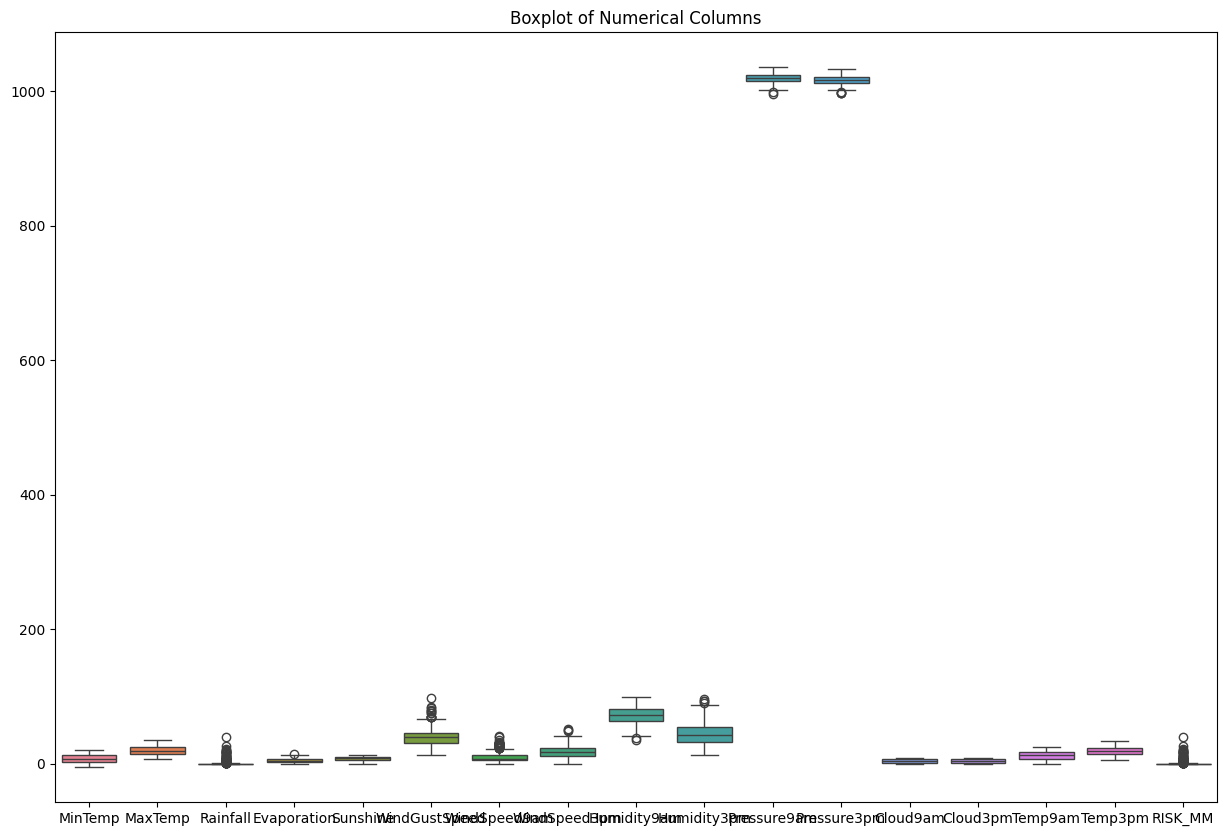

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.show()

In [15]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [16]:
print(df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  224.000000  224.000000  224.000000   224.000000  224.000000   
mean     6.153125   21.017411    0.015179     4.528571    8.715667   
std      5.879873    6.818033    0.059459     2.596425    3.012098   
min     -5.300000    8.800000    0.000000     0.600000    0.000000   
25%      0.875000   15.425000    0.000000     2.200000    7.300000   
50%      5.700000   19.950000    0.000000     4.100000    9.200000   
75%     11.525000   26.225000    0.000000     6.400000   11.000000   
max     17.900000   35.800000    0.400000    12.600000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     224.000000    224.000000    224.000000   224.000000   224.000000   
mean       36.007506      7.349371     16.535714    70.941964    39.316964   
std         9.918839      5.040117      7.802413    12.332509    13.478183   
min        13.000000      0.000000      2.000000    41.00

In [17]:
df.to_csv('preprocessed_weather_dataset.csv', index=False)
